In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score
from dmba import regressionSummary, exhaustive_search

%matplotlib inline

In [27]:
# Load dataset
IBM_DF = pd.read_csv('HR-Employee-Attrition.csv')

# Dropping unnecessary columns 
IBM_DF.drop(columns=['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], inplace=True)

In [28]:

# Drop duplicates
IBM_DF.drop_duplicates(inplace=True)  
 
# Encoding categorical variables
le = LabelEncoder()
categorical_columns = IBM_DF.select_dtypes(include=['object']).columns
for col in categorical_columns:
    IBM_DF[col] = le.fit_transform(IBM_DF[col])


In [29]:
# Feature Scaling
scaler = StandardScaler()
numeric_columns = IBM_DF.select_dtypes(include=['int64', 'float64']).columns
IBM_DF[numeric_columns] = scaler.fit_transform(IBM_DF[numeric_columns])

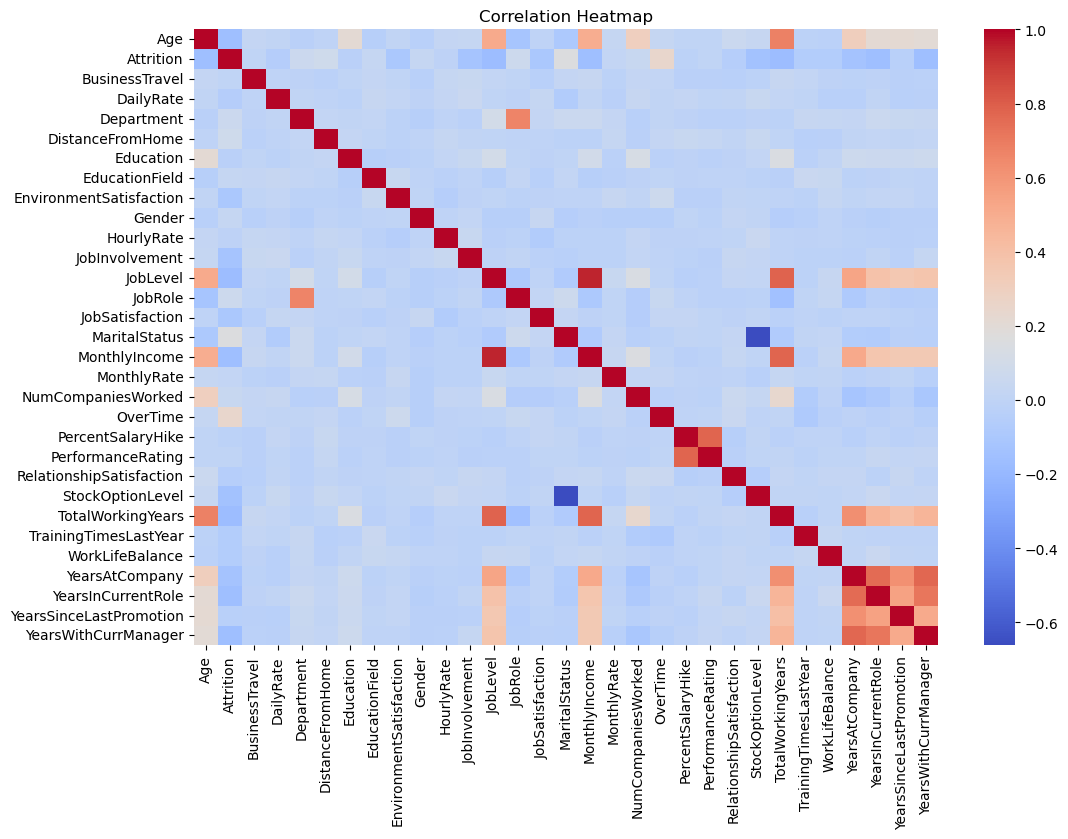

In [30]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(IBM_DF.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [31]:

## Clustering Analysis using K-Means
X_cluster = IBM_DF.drop(columns=['Attrition'])
kmeans = KMeans(n_clusters=2, random_state=0)
IBM_DF['Cluster'] = kmeans.fit_predict(X_cluster) 



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
## Clustering Silhouette Score
silhouette_avg = silhouette_score(X_cluster, IBM_DF['Cluster'])
print(f"Silhouette Score for Clustering: {silhouette_avg}")


Silhouette Score for Clustering: 0.12021209953619236


In [33]:
## Logistic Regression Model
X = IBM_DF.drop(columns=['Attrition'])
y = IBM_DF['Attrition'].astype(int)
#Convert target label    
y = y.replace(2,1)
#training split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1, shuffle=True)
#fit logistic regression
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
#prediction
logit_reg_pred = logit_reg.predict(valid_X)                   
logit_reg_proba = logit_reg.predict_proba(valid_X) 


In [34]:
##Model Evaluation
#precision, recall and specificity
precision = precision_score(valid_y, logit_reg_pred) 
recall = recall_score(valid_y, logit_reg_pred) 

tn,fp,fn,tp = confusion_matrix(valid_y, logit_reg_pred).ravel()
specificity = tn / (tn + fp)
accuracy = accuracy_score(valid_y, logit_reg_pred)


In [35]:
mae = mean_absolute_error(valid_y, logit_reg_pred)
rmse = np.sqrt(mean_squared_error(valid_y, logit_reg_pred))
r2 = r2_score(valid_y, logit_reg_pred)

In [36]:
#metrics

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Specificity: {specificity}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(valid_y, logit_reg_pred))
print("Confusion Matrix:\n", confusion_matrix(valid_y, logit_reg_pred))

Precision: 0.7291666666666666
Recall: 0.3431372549019608
Specificity: 0.9732510288065843
MAE: 0.1360544217687075
RMSE: 0.36885555678165877
R2 Score: 0.05107722101186152
Accuracy: 0.8639455782312925
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       486
           1       0.73      0.34      0.47       102

    accuracy                           0.86       588
   macro avg       0.80      0.66      0.69       588
weighted avg       0.85      0.86      0.84       588

Confusion Matrix:
 [[473  13]
 [ 67  35]]
